In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

D:\Users\chungch\AppData\Local\Continuum\Anaconda3\envs\python3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# one-way anova

### Example 1

Assume partner_status has no effect on conformity.  
Do a one-way anova.  
If PR(>F) <= 0.05, reject the assumption.

In [53]:
moore = sm.datasets.get_rdataset("Moore", "car", cache=True)

data = moore.data
data = data.rename(columns={"partner.status" :"partner_status"}) 

data.head()

,partner_status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [54]:
# r = 'conformity ~ C(fcategory, Sum)*C(partner_status, Sum)'
r = 'conformity ~ C(partner_status)'

moore_lm = ols(r, data=data).fit()

moore_lm.params

Intercept                   14.217391
C(partner_status)[T.low]    -4.262846
dtype: float64

In [59]:
moore_lm.bse

Intercept                   1.007990
C(partner_status)[T.low]    1.441621
dtype: float64

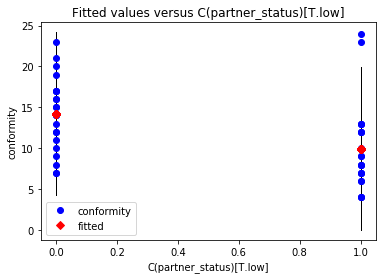

In [55]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(moore_lm, 1, ax=ax)

In [56]:
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame

print(table)

                        sum_sq    df         F    PR(>F)
C(partner_status)   204.332411   1.0  8.743733  0.005029
Residual           1004.867589  43.0       NaN       NaN


### Example 2

Assume gender has no effect on result.  
Do a one-way anova.  
If PR(>F) <= 0.05, reject the assumption.


In [49]:

df = pd.DataFrame(
    {'result': [0,0,0,0,0,1, 1,1,1,1,1,0],
     'gender': ['M','M','M','M','M','M', 'F','F','F','F','F','F'],
     'age': ['<50','<50','<50','>=50','>=50','>=50','<50','<50','<50','>=50','>=50','>=50']}
)

In [50]:
r = 'result ~ C(gender)'
results = ols(r, data=df).fit()
results.params

Intercept         0.833333
C(gender)[T.M]   -0.666667
dtype: float64

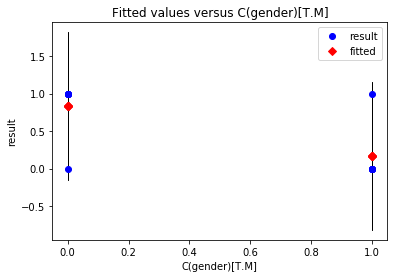

In [51]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(result_lm, 1, ax=ax)

In [52]:
table = sm.stats.anova_lm(results, typ=2) # Type 2 ANOVA DataFrame

print(table)

             sum_sq    df    F  PR(>F)
C(gender)  1.333333   1.0  8.0  0.0179
Residual   1.666667  10.0  NaN     NaN


In [63]:
def esq_sm(aov_table):
    return aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])

esq_sm(table)

0.16898148450809963

# two-way anova

### Example 1

In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tooth_growth_csv')
data[0:10]

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


In [12]:
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                      sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN


In [13]:
model.params

Intercept                       13.23
C(supp)[T.VC]                   -5.25
C(dose)[T.1.0]                   9.47
C(dose)[T.2.0]                  12.83
C(supp)[T.VC]:C(dose)[T.1.0]    -0.68
C(supp)[T.VC]:C(dose)[T.2.0]     5.33
dtype: float64

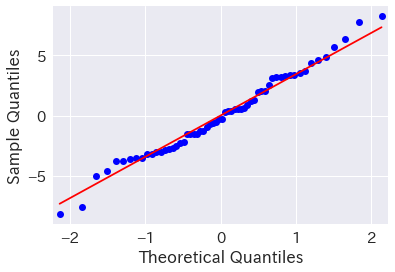

In [14]:
# Q-Q plot

res = model.resid 
fig = sm.qqplot(res, line='s')

### Example 2

In [3]:

df = pd.DataFrame(
    {'result': [0,0,0,0,0,1, 1,1,1,1,1,0],
     'gender': ['M','M','M','M','M','M', 'F','F','F','F','F','F'],
     'age': ['<50','<50','<50','<50','<50','>=50','>=50','>=50','>=50','>=50','>=50','>=50'],
     'location': np.random.choice(['Tokyo', 'Shinjuku'], 12)}
)
df

,age,gender,location,result
0,<50,M,Shinjuku,0
1,<50,M,Shinjuku,0
2,<50,M,Shinjuku,0
3,<50,M,Tokyo,0
4,<50,M,Shinjuku,0
5,>=50,M,Tokyo,1
6,>=50,F,Tokyo,1
7,>=50,F,Tokyo,1
8,>=50,F,Shinjuku,1
9,>=50,F,Shinjuku,1


In [6]:
formula = """
result ~ 
C(gender) + C(age) + C(location) + C(gender):C(age) + C(gender):C(location) + C(location):C(age)
"""
model = ols(formula, df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                         sum_sq   df          F    PR(>F)
C(gender)              0.665633  1.0   6.989151  0.033244
C(age)                 3.068778  1.0  32.222167  0.000753
C(location)            0.227766  1.0   2.391540  0.165914
C(gender):C(age)       0.193798  1.0   2.034884  0.196766
C(gender):C(location)  0.090580  1.0   0.951087  0.361932
C(location):C(age)     0.023359  1.0   0.245270  0.635592
Residual               0.666667  7.0        NaN       NaN


In [7]:
model.summary()

D:\Users\chungch\AppData\Local\Continuum\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     6.125
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0193
Time:                        16:02:52   Log-Likelihood:                0.31497
No. Observations:                  12   AIC:                             9.370
Df Residuals:                       7   BIC:                             11.79
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.2222      0.111      2.009      0.085      -0.039       0.484
C(gender)[T.M]                         -0.2222      0.142     -1.564      0.162      -0.558       0.114
C(age)[T.>=50]                          0.7778      0.151      5.148      0.001       0.421       1.135
C(location)[T.Tokyo]                   -0.2222      0.194     -1.145      0.290      -0.681       0.237
C(gender)[T.M]:C(age)[T.>=50]           0.3333      0.234      1.426      0.197      -0.219       0.886
C(gender)[T.M]:C(location)[T.Tokyo]     0.2222      0.228      0.975      0.362      -0.317       0.761
C(location)[T.Tokyo]:C(age)[T.>=50]    -0.1111      0.224     -0.495      0.636      -0.642       0.419
==============================================================================
Omnibus:                       13.375   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.500
Skew:                          -1.414   Prob(JB):                       0.0143
Kurtosis:                       6.000   Cond. No.                     7.29e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.67e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""